In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
k = 5
l = 3
m = 2
g = 9.8
r0 = 15
theta0 = np.pi/8
vr0 = 0
vtheta0 = 0

In [6]:
t = np.linspace(0,30,2001)
h = 0.015

In [7]:
def System(r0,v0):
    
    r,theta = r0
    vr,vtheta = v0
    
    ar = k/m *(l-r) + g*np.cos(theta) + r*vtheta**2
    at = - g/r * np.sin(theta)- 2/r * vr*vtheta
    
    return np.array([vr,vtheta,ar,at])

In [8]:
r0_ = [r0,theta0]
v0_ = [vr0,vtheta0]

In [11]:
def beeman(system,r0,v0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    R = np.zeros((len(t),2))
    V = np.zeros((len(t),2))
    
    R[0] = r0
    V[1] = v0
    
    K1 = np.zeros(2)
    
    for i in range(1,len(t)): 
        if i==1:
            a=system(r0,v0)
            K1 = a[0:2]
            R[i] = R[i-1] + h*K1[0]
            V[i] = V[i-1] + h*K1[1]
        else:
            for j in range(2):
            
                Xi = system(R[i-1],V[i-1])
                Xi_1 = system(R[i-2],V[i-2])
                Xi_2 = system(R[i-3],V[i-3])
                R[i,j] = R[i-1,j] + V[i-1,j]*h + (1./6)*(4*Xi[2+j] - Xi_1[2+j])*h**2
                V[i,j] = V[i-1,j] + 0.5*(3*Xi[2+j]  - Xi_1[2+j])*h    # predictor
        
                #V[i,j] += V[i-1,j] + (1./12)*(5*Xi[2+j] + 8*Xi_1[2+j] - Xi_2[2+j])*h
            
    return R,V

In [22]:
R_,V_ = beeman(System,r0_,v0_,t)
print(R_)

[[15.          0.39269908]
 [15.          0.39269908]
 [14.99764358  0.39267095]
 ...
 [ 7.95849151 20.56342551]
 [ 7.96588169 20.57020208]
 [ 7.97049863 20.57669508]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


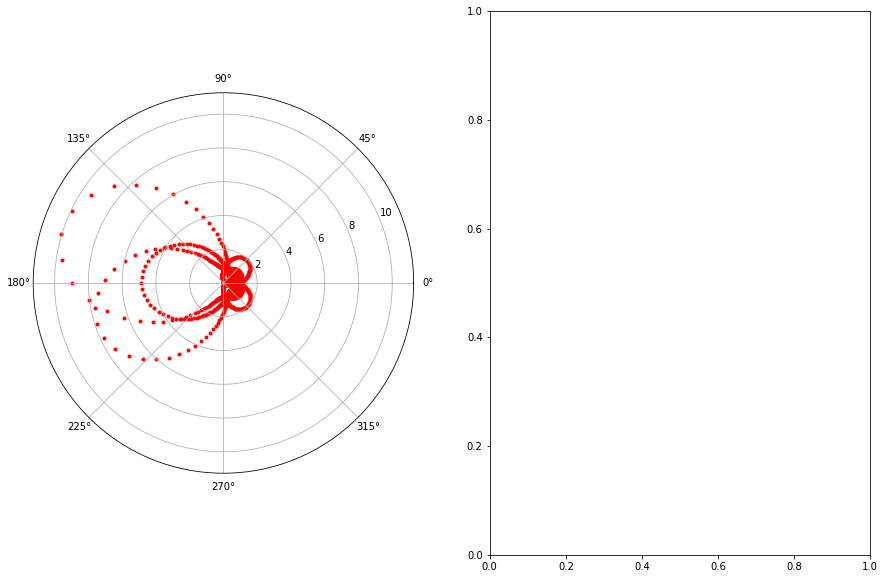

In [30]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax2 = fig.add_subplot(1,2,2,)
ax1.scatter(R_[:,1],V_[:,1],marker='.',color='r')



